In [1]:
print(4)

4


In [1]:
#import
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
#all metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
#random forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Logistic Regression
from sklearn.linear_model import LogisticRegression


# import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

#IMPORTANT
from project_1.library.tally import *

ModuleNotFoundError: No module named 'project_1'

In [2]:
#load data
df_train=pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val=pd.read_csv('../data/for_modelling/credit_score_valid.csv')

#split X from y
X_train, y_train = split_x_from_y(df_train)
X_val, y_val = split_x_from_y(df_val)

names=['RandomForestClassifier', 'GradientBoostingClassifier',
       'GaussianNB', 'LogisticRegression']

models=[RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), GaussianNB(), LogisticRegression(random_state=42)]

s=create_tally(X_train, X_val, y_train, y_val, models=models, names=names)
s

/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/pyth

,model,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1,f1_std
0,RandomForestClassifier,0.710095,0.042361,0.488819,0.208687,0.173968,0.069293,0.254133,0.100798
0,GradientBoostingClassifier,0.708584,0.035948,0.457031,0.142007,0.219206,0.090353,0.294851,0.110176
0,GaussianNB,0.455479,0.043128,0.327565,0.019603,0.871429,0.079189,0.475447,0.028268
0,LogisticRegression,0.695771,0.041189,0.444387,0.117448,0.268889,0.072042,0.333815,0.086033


In [3]:
#visualize s with std

df=pd.concat([df_train, df_val])
df['DEFAULT'].value_counts()

DEFAULT
0    450
1    178
Name: count, dtype: int64

In [4]:
df_train['DEFAULT'].value_counts()

DEFAULT
0    351
1    139
Name: count, dtype: int64

In [5]:
# make number of defaults equal
df_train_default=df_train[df_train['DEFAULT']==1]
df_train_no_default=df_train[df_train['DEFAULT']==0].sample(n=df_train_default.shape[0], random_state=42)
df_train_new=pd.concat([df_train_default, df_train_no_default])
df_train_new['DEFAULT'].value_counts()

DEFAULT
1    139
0    139
Name: count, dtype: int64

In [6]:
X_train_new, y_train_new = split_x_from_y(df_train_new)
X_val, y_val = split_x_from_y(df_val)

s=create_tally(X_train_new, X_val, y_train_new, y_val, models=models, names=names)
s

/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims,

,model,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1,f1_std
0,RandomForestClassifier,0.552897,0.042508,0.478488,0.057308,0.348730,0.033112,0.400550,0.026514
0,GradientBoostingClassifier,0.593976,0.064837,0.529704,0.095829,0.438730,0.093227,0.478555,0.091800
0,GaussianNB,0.509667,0.043359,0.462784,0.025358,0.836508,0.120325,0.591320,0.030991
0,LogisticRegression,0.550402,0.038606,0.470848,0.048575,0.438095,0.072974,0.452866,0.058707


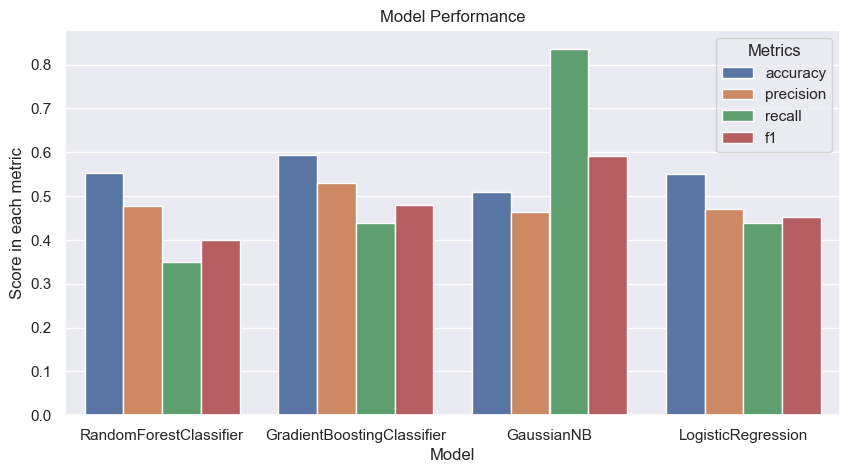

In [7]:
# visualize s without std
# prepare data for visualization

create_visualization(s)

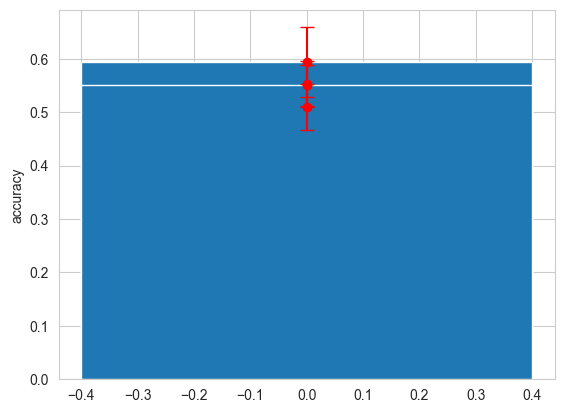

In [61]:
# creating plot

plt.bar(s.index, s['accuracy'], capsize=5)
plt.errorbar(s.index, s['accuracy'], yerr=s['accuracy_std'], fmt='o',color='red', capsize=5)
plt.ylabel('accuracy')
plt.show()

In [62]:
map_gambling(X_train)

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,2783,1855,0,0.6665,0.0000,0.0000,103,74,0.7184,0.0370,...,1.6665,2.5003,0.0000,0,0,0,0,1,0,570
1,314430,445442,707468,1.4167,2.2500,1.5882,35861,29157,0.8131,0.1141,...,0.8333,0.5882,0.3704,2,1,0,1,1,0,691
2,161773,517674,2782496,3.2000,17.2000,5.3750,3716,2533,0.6816,0.0230,...,1.0000,0.3125,0.0581,0,1,1,1,1,1,520
3,16014,97685,20818,6.1000,1.3000,0.2131,637,187,0.2936,0.0398,...,1.0000,0.1639,0.7692,0,1,0,0,1,0,654
4,193225,1410542,2589215,7.3000,13.4000,1.8356,5276,2325,0.4407,0.0273,...,1.0000,0.1370,0.0746,0,1,1,0,1,1,552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,20007,22508,457665,1.1250,22.8752,20.3334,1451,861,0.5934,0.0725,...,1.2500,1.1111,0.0546,0,1,0,0,1,0,423
486,20846,268679,23162,12.8888,1.1111,0.0862,1302,533,0.4094,0.0625,...,1.1111,0.0862,1.0000,1,1,0,0,1,0,584
487,89235,1106514,160623,12.4000,1.8000,0.1452,2413,835,0.3460,0.0270,...,1.0000,0.0806,0.5556,0,1,0,0,1,0,631
488,197073,1021195,1863233,5.1818,9.4545,1.8246,8416,3948,0.4691,0.0427,...,0.9091,0.1754,0.0962,2,1,0,1,1,1,572


In [63]:
# function for validators

models=[RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), GaussianNB(), LogisticRegression(random_state=42)]
names=['RandomForestClassifier', 'GradientBoostingClassifier',
       'GaussianNB', 'LogisticRegression']


score=validate(X_train, X_val, y_train, y_val, models, names)
score

,names,accuracy,precision,recall,f1
0,RandomForestClassifier,0.717391,0.500000,0.153846,0.235294
0,GradientBoostingClassifier,0.702899,0.444444,0.205128,0.280702
0,GaussianNB,0.456522,0.323529,0.846154,0.468085
0,LogisticRegression,0.652174,0.320000,0.205128,0.250000
